## Import libraries

In [729]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from scipy.stats import zscore

## Get the data

In [730]:
df = pd.read_csv("../../../datasets/parte2/treino/dataset.csv")

## Feature engineering

#### Split date

In [731]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d", utc=True)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop(['date'], inplace=True, axis=1)


df.head()

,dt,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,...,rain_1h,clouds_all,weather_description,hour,normal,economic_schedule,self-consumption,year,month,day
0,1672531200,local,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,...,3.72,100,moderate rain,0,0.0,0.467,0.0,2023,1,1
1,1672534800,local,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,...,3.26,100,moderate rain,1,0.0,0.577,0.0,2023,1,1
2,1672538400,local,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,...,2.44,100,moderate rain,2,0.0,0.346,0.0,2023,1,1
3,1672542000,local,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,...,1.74,100,moderate rain,3,0.0,0.270,0.0,2023,1,1
4,1672545600,local,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,...,1.13,100,moderate rain,4,0.0,0.252,0.0,2023,1,1


#### Remove city_name

In [732]:
df.drop('city_name', axis=1, inplace=True)

df.head()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,hour,normal,economic_schedule,self-consumption,year,month,day
0,1672531200,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,2.02,3.72,100,moderate rain,0,0.0,0.467,0.0,2023,1,1
1,1672534800,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,2.18,3.26,100,moderate rain,1,0.0,0.577,0.0,2023,1,1
2,1672538400,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,2.88,2.44,100,moderate rain,2,0.0,0.346,0.0,2023,1,1
3,1672542000,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,3.63,1.74,100,moderate rain,3,0.0,0.270,0.0,2023,1,1
4,1672545600,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,4.58,1.13,100,moderate rain,4,0.0,0.252,0.0,2023,1,1


#### Remove day, month, year and hour

In [733]:
df.drop('day', axis=1, inplace=True)
df.drop('year', axis=1, inplace=True)

df.head()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,hour,normal,economic_schedule,self-consumption,month
0,1672531200,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,2.02,3.72,100,moderate rain,0,0.0,0.467,0.0,1
1,1672534800,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,2.18,3.26,100,moderate rain,1,0.0,0.577,0.0,1
2,1672538400,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,2.88,2.44,100,moderate rain,2,0.0,0.346,0.0,1
3,1672542000,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,3.63,1.74,100,moderate rain,3,0.0,0.270,0.0,1
4,1672545600,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,4.58,1.13,100,moderate rain,4,0.0,0.252,0.0,1


#### Remove dt

In [734]:
df.drop('dt', axis=1, inplace=True)

df.head()

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,hour,normal,economic_schedule,self-consumption,month
0,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,2.02,3.72,100,moderate rain,0,0.0,0.467,0.0,1
1,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,2.18,3.26,100,moderate rain,1,0.0,0.577,0.0,1
2,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,2.88,2.44,100,moderate rain,2,0.0,0.346,0.0,1
3,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,3.63,1.74,100,moderate rain,3,0.0,0.270,0.0,1
4,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,4.58,1.13,100,moderate rain,4,0.0,0.252,0.0,1


## Label binarizer

In [735]:
df['weather_description'] = df['weather_description'].replace('clear sky', 'sky is clear')

In [736]:
#lb = LabelBinarizer()

#lb_results = lb.fit_transform(df['weather_description'])

#lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

#df = pd.concat([df, lb_results_df], axis=1)

df.drop('weather_description', axis=1, inplace=True)

In [737]:
df.head()

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,hour,normal,economic_schedule,self-consumption,month
0,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,2.02,3.72,100,0,0.0,0.467,0.0,1
1,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,2.18,3.26,100,1,0.0,0.577,0.0,1
2,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,2.88,2.44,100,2,0.0,0.346,0.0,1
3,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,3.63,1.74,100,3,0.0,0.270,0.0,1
4,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,4.58,1.13,100,4,0.0,0.252,0.0,1


## Missing Values

#### Remove sea_level, grnd_level and rain_1h

In [738]:
df.drop('sea_level', axis=1, inplace=True)
df.drop('grnd_level', axis=1, inplace=True)
df.drop('rain_1h', axis=1, inplace=True) # experimentar a media

In [739]:
print(df.isna().sum())

temp                 0
feels_like           0
temp_min             0
temp_max             0
pressure             0
humidity             0
wind_speed           0
clouds_all           0
hour                 0
normal               0
economic_schedule    0
self-consumption     0
month                0
dtype: int64


## Write new csv

In [740]:
df['injection'] = df['injection'].fillna("None")

#lb_make = LabelEncoder()
#df['injection'] = lb_make.fit_transform(df['injection'])


In [741]:
df.head()

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,hour,normal,economic_schedule,self-consumption,month
0,12.93,12.76,12.72,13.43,1019,95,2.02,100,0,0.0,0.467,0.0,1
1,13.49,13.38,13.43,13.90,1018,95,2.18,100,1,0.0,0.577,0.0,1
2,13.55,13.44,13.48,14.82,1017,95,2.88,100,2,0.0,0.346,0.0,1
3,13.61,13.51,12.01,14.82,1016,95,3.63,100,3,0.0,0.270,0.0,1
4,13.59,13.49,12.01,14.82,1015,95,4.58,100,4,0.0,0.252,0.0,1


In [742]:
df.to_csv('../../../datasets/parte2/treino/dataset_prepared.csv', index=False)

<Axes: >

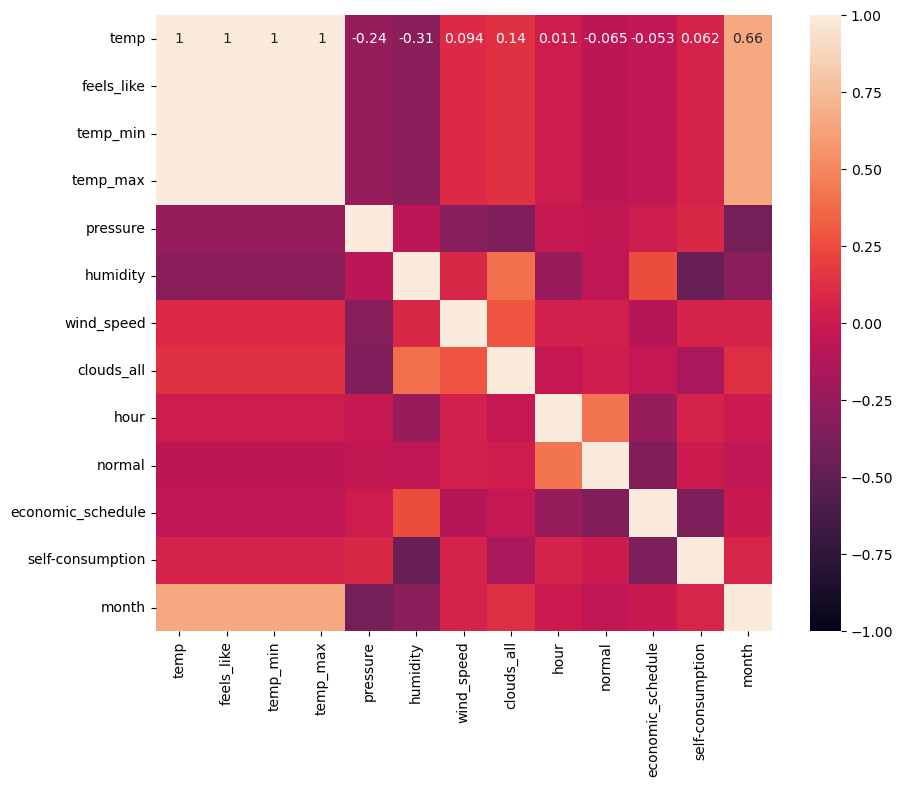

In [743]:
corr_matrix = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

In [744]:
#print(corr_matrix['injection'])